In [1]:
import matplotlib.pyplot as plt
from time import time
from random import randint
import math

def run_and_plot(functions, names, generate_instance, start, end, step):
    for f in functions:
        timings = []
        for i in range(start, end, step):
            args = generate_instance(i)
            startt = time()
            f(*args)
            endt = time()
            timings.append(math.sqrt(endt - startt))
        plt.plot(timings)
    plt.legend([n for n in names])

## Knapsack problem

In [2]:
def knapsack_recursive(W, V, C):
    
    def K(i, j):
        if i == 0:
            return 0 if j >= 0 else -math.inf
        return max(
            K(i - 1, j),
            K(i - 1, j - W[i - 1]) + V[i - 1]
        )
    
    return K(len(W), C)

In [158]:
# W_example = [4, 3, 3]
# V_example = [5, 3, 3]
# C_example = 6
W_example = [3,8,8,2,1,8,2,3]
V_example = [5,4,7,5,11,20,18,20]
C_example = 12

In [159]:
knapsack_recursive(W_example, V_example, C_example)

59

In [160]:
def knapsack_dynamic(W, V, C): # O(nC)
    n = len(W)
    tbl = [[0] * (C + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(C + 1):
            tbl[i][j] = tbl[i - 1][j]
            if j >= W[i - 1]:
                tbl[i][j] = max(
                    tbl[i][j],
                    tbl[i - 1][j - W[i - 1]] + V[i - 1]
                )
    print("\n".join([str(l) for l in tbl]))
    return tbl[-1][-1]

In [161]:
knapsack_dynamic(W_example, V_example, C_example)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9]
[0, 0, 0, 5, 5, 5, 5, 5, 7, 7, 7, 12, 12]
[0, 0, 5, 5, 5, 10, 10, 10, 10, 10, 12, 12, 12]
[0, 11, 11, 16, 16, 16, 21, 21, 21, 21, 21, 23, 23]
[0, 11, 11, 16, 16, 16, 21, 21, 21, 31, 31, 36, 36]
[0, 11, 18, 29, 29, 34, 34, 34, 39, 39, 39, 49, 49]
[0, 11, 18, 29, 31, 38, 49, 49, 54, 54, 54, 59, 59]


59

In [7]:
def generate_knapsack(n, W_ratio, V_max, C):
    W = [randint(1, int(W_ratio * C) + 1) for _ in range(n)]
    V = [randint(1, V_max) for _ in range(n)]
    return (W, V, C)

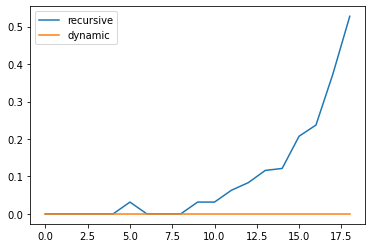

In [8]:
run_and_plot(
    [knapsack_recursive, knapsack_dynamic],
    ["recursive", "dynamic"],
    lambda n: generate_knapsack(n, 0.1, n, n),
    1, 20, 1
)